In [ ]:
# Importação das bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Carregar o conjunto de dados Diabetes
diabetes = load_diabetes()  # Carrega o dataset Diabetes

# Criar um DataFrame para as features (variáveis independentes)
x = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Criar uma Série para o target (variável dependente)
y = pd.Series(diabetes.target, name='target')

# Análise Exploratória Básica
print("\n=== Informações do Dataset ===")
print(f"Número de amostras: {x.shape[0]}")  # Número de linhas (amostras)
print(f"Número de features: {x.shape[1]}")  # Número de colunas (features)
print("\nPrimeiras linhas do dataset:")
print(pd.concat([x, y], axis=1).head())  # Exibe as primeiras 5 linhas do dataset


=== Informações do Dataset ===
Número de amostras: 442
Número de features: 10

Primeiras linhas do dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [3]:
# Pré-processamento

# Divisão em treino e teste (80% treino, 20% teste)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [6]:
# Treinamento do Modelo (Regressão Linear)
model = LinearRegression()  # Cria uma instância do modelo de regressão linear
model.fit(x_train, y_train)  # Treina o modelo com os dados de treino

# Previsões
y_pred = model.predict(x_test)  # Faz previsões para os dados de teste

# Métricas de Avaliação
mae = mean_absolute_error(y_test, y_pred)  # Calcula o Erro Absoluto Médio (MAE)


print("\n=== Métricas de Desempenho ===")
print(f"MAE: {mae:.2f}")  # Exibe o MAE



=== Métricas de Desempenho ===
MAE: 42.79


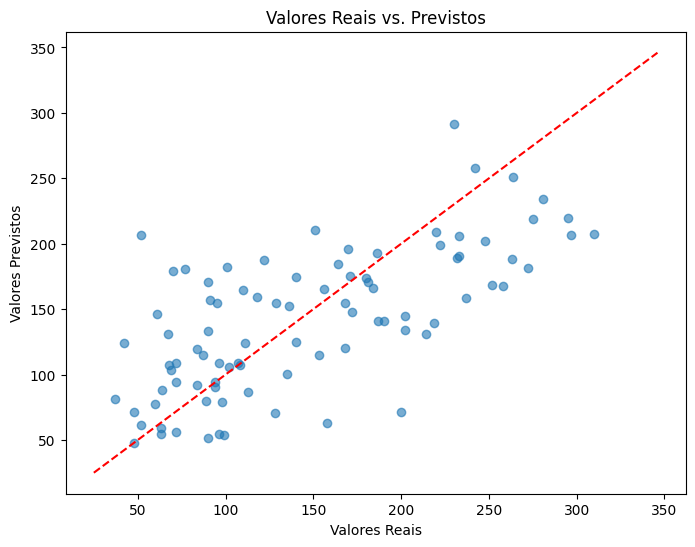

In [5]:
# Gráfico de Dispersão (Valores Reais vs. Previstos)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)  # Plota os valores reais vs. previstos
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Linha de referência (y = x)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs. Previstos')
plt.show()